In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
housing = pd.read_csv('https://raw.githubusercontent.com/thomouvic/SENG474/main/data/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Create Test Set

In [27]:
# using scikit-learn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

len(train_set), len(test_set)

(16512, 4128)

# Prepare data for ML

In [28]:
# we separate the predictors and the labels

# drop() creates a copy of the data and does not affect the original data
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

housing_test = test_set.drop("median_house_value", axis=1)
housing_labels_test = test_set["median_house_value"].copy()

### Clean the Data

In [29]:
# We do here data imputation for the missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

imputer.statistics_

# the fit function "fits" the imputer to the data
# in this case, the imputer computes the median of each attribute 
# and stores it in its statistics_ instance variable

array([-118.49  ,   34.25  ,   29.    , 2129.    ,  437.    , 1169.    ,
        411.    ,    3.5246])

In [30]:
# the transform function applies the imputer to the data

X = imputer.transform(housing_num)
X

# the result is a plain NumPy array containing the transformed features

# There are other ways to impute missing values, 
# such as using the mean or the most frequent value
# for example, 
# SimpleImputer(strategy="mean") or 
# SimpleImputer(strategy="most_frequent")

array([[-1.1722e+02,  3.2750e+01,  3.4000e+01, ...,  2.6540e+03,
         1.0720e+03,  4.5878e+00],
       [-1.1703e+02,  3.2690e+01,  1.0000e+01, ...,  6.9800e+02,
         1.6700e+02,  4.6648e+00],
       [-1.2227e+02,  3.7740e+01,  2.8000e+01, ...,  2.9740e+03,
         1.4840e+03,  3.6875e+00],
       ...,
       [-1.1933e+02,  3.6280e+01,  1.6000e+01, ...,  1.0770e+03,
         5.2000e+02,  2.1250e+00],
       [-1.1719e+02,  3.4080e+01,  2.2000e+01, ...,  1.5670e+03,
         4.9400e+02,  2.6536e+00],
       [-1.1886e+02,  3.4220e+01,  2.2000e+01, ...,  6.7300e+02,
         1.9500e+02,  6.2708e+00]])

### Handling Text and Categorical Attributes

In [31]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR BAY
14265,<1H OCEAN
2271,INLAND
17848,NEAR BAY
6252,INLAND
9389,<1H OCEAN
6113,INLAND
6061,<1H OCEAN


In [32]:
# OrdinalEncoder is used to convert categorical values to numerical values
# for example, ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
# can be converted to [0, 1, 2, 3, 4]

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

# the fit_transform function 
# fits the encoder to the data and then 
# transforms the data
# equivalent to calling fit() and then transform().

print(housing_cat_encoded[:10])
print(ordinal_encoder.categories_)

[[4.]
 [4.]
 [3.]
 [0.]
 [1.]
 [3.]
 [1.]
 [0.]
 [1.]
 [0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [33]:
# OneHotEncoder is used to convert categorical values to one-hot vectors
# for example, '<1H OCEAN' can be converted to [1, 0, 0, 0, 0]
# 'INLAND' can be converted to [0, 1, 0, 0, 0], 
# 'NEAR OCEAN' can be converted to [0, 0, 0, 0, 1], and so on.

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

print(housing_cat_1hot)

# the result is a SciPy sparse matrix
# a sparse matrix only stores the location of non-zero elements
# instead of storing all the elements of the matrix
# for example, (0,4) 1.0 means that the element at row 0 and column 4 is 1.0. 

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>
  Coords	Values
  (0, 4)	1.0
  (1, 4)	1.0
  (2, 3)	1.0
  (3, 0)	1.0
  (4, 1)	1.0
  (5, 3)	1.0
  (6, 1)	1.0
  (7, 0)	1.0
  (8, 1)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 4)	1.0
  (12, 0)	1.0
  (13, 3)	1.0
  (14, 1)	1.0
  (15, 1)	1.0
  (16, 1)	1.0
  (17, 0)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 0)	1.0
  (16489, 4)	1.0
  (16490, 3)	1.0
  (16491, 0)	1.0
  (16492, 0)	1.0
  (16493, 3)	1.0
  (16494, 1)	1.0
  (16495, 1)	1.0
  (16496, 1)	1.0
  (16497, 1)	1.0
  (16498, 0)	1.0
  (16499, 0)	1.0
  (16500, 1)	1.0
  (16501, 4)	1.0
  (16502, 1)	1.0
  (16503, 1)	1.0
  (16504, 4)	1.0
  (16505, 0)	1.0
  (16506, 4)	1.0
  (16507, 3)	1.0
  (16508, 0)	1.0
  (16509, 1)	1.0
  (16510, 1)	1.0
  (16511, 0)	1.0


In [34]:
# if you want to convert the sparse matrix to a NumPy array
# you can call the toarray() method

print(housing_cat_1hot.toarray())

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [35]:
# if we want to get the list of values that correspond to the one-hot vectors
# we can use the get_feature_names_out() method

cat_encoder.get_feature_names_out()

# what this array means is that 
# the first column represents the value '<1H OCEAN',
# the second column represents the value 'INLAND', and so on.

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

### Feature Scaling and Transformation

In [36]:
# Now we will scale the numerical features
# We scale the features so that they have the same scale, e.g. [0, 1]
# This is important for some machine learning algorithms
# Imagine you have two features, 
# one ranging from 0 to 100 (e.g. age) and 
# the other from 0 to 100000 (e.g. income)
# The algorithm might give more importance to the second feature

# The formula to scale a feature x is:
# x_scaled = (x - x_min) / (x_max - x_min)
# where x is the original value, 
# x_min is the minimum value of x, and 
# x_max is the maximum value of x

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
housing_minmax = min_max_scaler.fit_transform(housing_num)
housing_minmax

# Recall: fit_transform() calls fit() and then transform(). 
# It's a convenience method.

array([[0.71015936, 0.02231668, 0.64705882, ..., 0.07430141, 0.17612235,
        0.28192025],
       [0.72908367, 0.01594049, 0.17647059, ..., 0.01947925, 0.02729814,
        0.28723052],
       [0.20717131, 0.55260361, 0.52941176, ..., 0.08327027, 0.24387436,
        0.21983145],
       ...,
       [0.5       , 0.39744952, 0.29411765, ..., 0.03010174, 0.0853478 ,
        0.11207432],
       [0.71314741, 0.16365569, 0.41176471, ..., 0.04383531, 0.08107219,
        0.14852899],
       [0.54681275, 0.17853348, 0.41176471, ..., 0.01877855, 0.03190265,
        0.39798761]])

In [37]:
# This is an alternative way to scale the features
# The formula to standardize a feature x is:
# x_standardized = (x - x_mean) / x_std
# where x is the original value,
# x_mean is the mean of x, and
# x_std is the standard deviation of x

# StandardScaler scales the features so that 
# they have a mean of 0 and a standard deviation of 1
# This is more robust to outliers than MinMaxScaler

# To see why, consider a feature for which most values are between 0 and 100, 
# but there are a few outliers at 100000
# MinMaxScaler will scale the 0-100 values to 0-1, 
# the outliers will be very close to 1, 
# whereas the other values will be squished to be close to 0
# 
# If there are many values between 0 and 100, 
# the outliers will have less impact on the mean and standard deviation
# and StandardScaler will produce better results.


from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
housing_standard = standard_scaler.fit_transform(housing_num)
housing_standard

array([[ 1.17299302, -1.35041487,  0.42853749, ...,  1.0810111 ,
         1.50750741,  0.37969797],
       [ 1.26802809, -1.37853628, -1.47350948, ..., -0.64384214,
        -0.87870693,  0.42006824],
       [-1.3529389 ,  0.98834939, -0.04697426, ...,  1.36319568,
         2.5938282 , -0.09231969],
       ...,
       [ 0.11760365,  0.30406165, -0.99799774, ..., -0.30962978,
         0.0520485 , -0.91152173],
       [ 1.18799856, -0.72705686, -0.522486  , ...,  0.12246535,
        -0.01650573, -0.63438241],
       [ 0.35269038, -0.66144022, -0.522486  , ..., -0.66588782,
        -0.80487931,  1.26207687]])

### Custom Transformers

A `FunctionTransformer` forwards its X arguments to a user-defined function or function object and returns the result of this function.

In [38]:
# import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)

log_pop = log_transformer.fit_transform(housing[["population"]])
log_pop

,population
14196,7.883823
8267,6.548219
17445,7.997663
14265,7.686162
2271,4.143135
...,...
11284,6.395262
11964,6.595781
5390,6.981935
860,7.356918


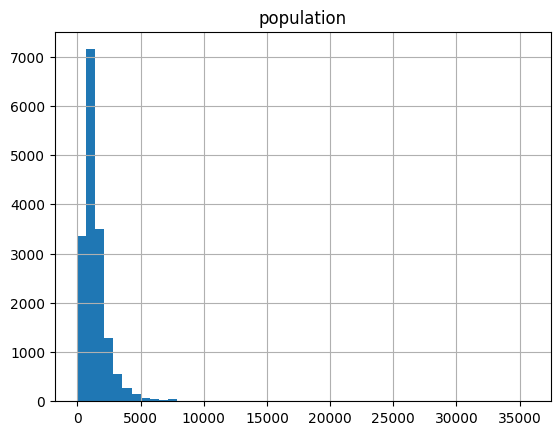

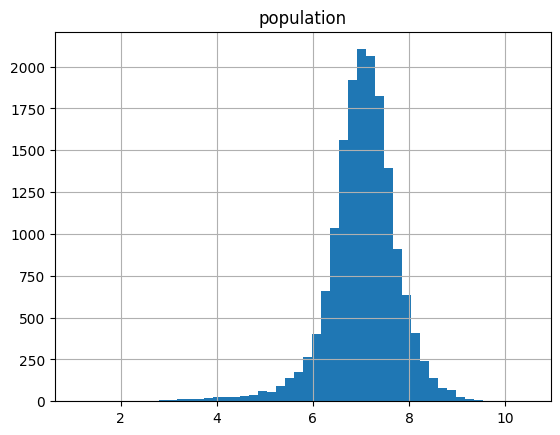

In [39]:
# Compare the histograms of the original and log transformed data
# Note that the log transformation makes the data more normally distributed
pop = housing[["population"]]

pop.hist(bins=50);
log_pop.hist(bins=50);

# Transformation Pipelines

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# extract numerical and categorical attributes
# into separate dataframes
housing_num = housing.select_dtypes(include=[np.number])
housing_cat = housing.select_dtypes(include=['object'])

# obtain the column names of the numerical and categorical attributes
num_attribs = list(housing_num)
cat_attribs = list(housing_cat)

# create a pipeline for numerical attributes
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), 
                             StandardScaler())

# create a pipeline for categorical attributes
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), 
                             OneHotEncoder(handle_unknown='ignore'))

# Combine the numerical and categorical pipelines using 'ColumnTransformer'
# Here, 'ColumnTransformer' takes a list of tuples,
# each tuple contains a name, a pipeline, and a list of columns 
# that the pipeline should be applied to.
# The output matrices of the pipelines are concatenated side-by-side
# into a single feature matrix.
preprocess_pipeline = ColumnTransformer(
    [('num', num_pipeline, num_attribs), 
     ('cat', cat_pipeline, cat_attribs)])

housing_prepared = preprocess_pipeline.fit_transform(housing)
housing_prepared

array([[ 1.17299302, -1.35041487,  0.42853749, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.26802809, -1.37853628, -1.47350948, ...,  0.        ,
         0.        ,  1.        ],
       [-1.3529389 ,  0.98834939, -0.04697426, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.11760365,  0.30406165, -0.99799774, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18799856, -0.72705686, -0.522486  , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.35269038, -0.66144022, -0.522486  , ...,  0.        ,
         0.        ,  0.        ]])

In the above code, the `ColumnTransformer` is casually referred to as a "pipeline" due to its role in preprocessing data by applying different transformations to numerical and categorical columns in parallel. 

Although technically a `ColumnTransformer` is not a `Pipeline` object, this terminology is commonly used in machine learning workflows to describe any sequence of data transformations that prepares data for modeling. The `ColumnTransformer` combines separate pipelines for numerical and categorical data, functioning similarly to a pipeline by streamlining the preprocessing steps into a single, cohesive process.

Additionally, both transformers and pipelines in Scikit-Learn have similar methods (such as `.fit()`, `.transform()`, and `.fit_transform()`), allowing them to be used interchangeably in many contexts. This methodological similarity further blurs the lines between the specific classes.

In [41]:
# If we want to obtain a dataframe from the output of ColumnTransformer,
# we can use the get_feature_names_out() method to obtain the column names
# of the transformed data, and then create a dataframe using those names.

df_housing_num_tr = pd.DataFrame(housing_prepared, 
                                 columns=preprocess_pipeline.get_feature_names_out())
df_housing_num_tr

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
0,1.172993,-1.350415,0.428537,1.570557,1.376799,1.081011,1.507507,0.379698,0.0,0.0,0.0,0.0,1.0
1,1.268028,-1.378536,-1.473509,-0.809439,-0.900718,-0.643842,-0.878707,0.420068,0.0,0.0,0.0,0.0,1.0
2,-1.352939,0.988349,-0.046974,1.994289,2.441082,1.363196,2.593828,-0.092320,0.0,0.0,0.0,1.0,0.0
3,-1.127856,0.758691,-0.284730,0.646558,0.230833,0.661262,0.394820,0.682999,1.0,0.0,0.0,0.0,0.0
4,1.793222,-1.083261,-1.632013,-1.117906,-1.181804,-1.203802,-1.255755,-1.255560,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-1.402957,1.082087,1.617317,-0.777706,-0.742156,-0.731143,-0.804879,-1.335305,0.0,0.0,0.0,1.0,0.0
16508,0.592779,-0.816108,0.507789,-0.400173,-0.499510,-0.613860,-0.496385,1.421304,1.0,0.0,0.0,0.0,0.0
16509,0.117604,0.304062,-0.997998,-0.005374,-0.026228,-0.309630,0.052048,-0.911522,0.0,1.0,0.0,0.0,0.0
16510,1.187999,-0.727057,-0.522486,-0.078641,0.041040,0.122465,-0.016506,-0.634382,0.0,1.0,0.0,0.0,0.0


### Putting everything together in a pipeline

In [42]:
# The ratio_pipeline will compute the ratio of two columns
# and then standardize the result.

# FunctionTransformer is used to compute the ratio of two columns.
# feature_names_out parameter is used to specify the name of the new feature.
# First lambda function specifies the function that computes the ratio.
# Second lambda function specifies the name of the new feature.
# Second lambda function takes two arguments,
# the first argument is the Transformer itself, 
# and the second argument is the input columns.
# Since we only need to return the name of the new feature, "ratio",
# we ignore the other arguments.

ratio_pipeline = make_pipeline(
    SimpleImputer(strategy="median"), 
    FunctionTransformer(func=lambda X: X[:, [0]] / X[:, [1]],  
                        feature_names_out=lambda _, __: ["ratio"]), 
    StandardScaler()
)

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(func=np.log, feature_names_out="one-to-one"),
    StandardScaler())
# one-to-one means each input column will be transformed into one output column
# the naming of the output column will be the same as the input column

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

# The `ColumnTransformer` will utilize the attribute lists associated with 
# each pipeline to create separate dataframes from the input dataframe. 
# Subsequently, it will provide these dataframes as input to the corresponding pipelines.

# Here, rather than picking the numerical and categorical attributes automatically,
# we explicitly specify the attribute lists.

preprocessing = ColumnTransformer(
    [("bedrooms_per_rooms", ratio_pipeline, ["total_bedrooms","total_rooms"]),
     ("rooms_per_house", ratio_pipeline, ["total_rooms","households"]),
     ("people_per_house", ratio_pipeline, ["population","households"]),
     ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
     ("cat", cat_pipeline, ["ocean_proximity"])],
     
     remainder=default_num_pipeline
)

housing_prepared = preprocessing.fit_transform(housing)

print(housing_prepared.shape)
print(preprocessing.get_feature_names_out())

(16512, 16)
['bedrooms_per_rooms__ratio' 'rooms_per_house__ratio'
 'people_per_house__ratio' 'log__total_bedrooms' 'log__total_rooms'
 'log__population' 'log__households' 'log__median_income'
 'cat__ocean_proximity_<1H OCEAN' 'cat__ocean_proximity_INLAND'
 'cat__ocean_proximity_ISLAND' 'cat__ocean_proximity_NEAR BAY'
 'cat__ocean_proximity_NEAR OCEAN' 'remainder__longitude'
 'remainder__latitude' 'remainder__housing_median_age']


The names of features are constructed as `<name of transformer or pipeline>__<name of feature>`.

(Recall, transformers and pipelines are often used interchangably)

In `bedrooms_per_rooms__ratio`:

* `bedrooms_per_rooms` is the name of the pipeline that created this feature. The pipeline is instantiated to `ratio_pipeline`.
* `ratio` is the name of the feature that the `ratio_name()` function created. 

In `log__population`:

* `log` is the name of the pipeline that created this feature. The pipeline is instantiated to `log_pipeline`.
* `population` is the name of the feature that `FunctionTransformer(np.log, feature_names_out="one-to-one")` --used in the `log_pipeline`-- creates if a dataframe with a `population` column is provided. This is because we have specified `feature_names_out="one-to-one"`, which means the output feature will have the same name as the input feature. 


In `cat__ocean_proximity_INLAND`:

* `cat` is the name of the pipeline that created this feature. The pipeline is instantiated to `cat_pipeline`. 
* `ocean_proximity_INLAND` is the name of the feature that `OneHotEncoder` --used in the `cat_pipeline`-- creates if a dataframe with a `ocean_proximity` column that contains a value `INLAND` is provided.


In `remainder__longitude`:

* `remainder` is the name of the pipeline that created this feature. The last line in our `ColumnTransformer` creates a pipeline called `remainder` which is instantiated to `default_num_pipeline`.  
* `longitude` is the name of the feature that `SimpleImputer` and `StandardScaler` --used in the pipeline-- creates. These transformers are set to `feature_names_out="one-to-one"` internally.

# Select and Train a Model

In [43]:
# Now let's create a linear regression model
# and add it to the pipeline

from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

/home/alex/Documents/private-git/SENG 474/.venv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms_per_rooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function <lambda...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['total_bedrooms',
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity'])])),
                ('linearregression', LinearRegression())])

In [44]:
# Let's predict for the training set itself

housing_predictions = lin_reg.predict(housing)
housing_predictions

array([290026.80466344, 211654.79158496, 270948.05803132, ...,
       102351.23170435, 100649.59774564, 294509.87386336])

In [45]:
# Let's see how well the model performs
# We will use the root mean squared error (RMSE)
# RMSE is a measure of how well the model performs

from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
lin_rmse

/home/alex/Documents/private-git/SENG 474/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(70908.74327973358)

In [46]:
# Let's try a more powerful model
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocess_pipeline, DecisionTreeRegressor())
tree_reg.fit(housing, housing_labels)

housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
tree_rmse

/home/alex/Documents/private-git/SENG 474/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(0.0)

An error of 0.0 means the model probably has overfit the data.
Let's try cross-validation. 

The following code randomly splits the training set into 10 non-overlapping
subsets called folds, then it trains and evaluates the model 10 times, 
picking a different fold for evaluation every time and using the
other 9 folds for training. 

The result is an array containing the 10 evaluation scores:

### Cross-Validation

In [47]:
# What is cross-validation?
# Cross-validation is a technique used to evaluate the performance of a model.
# Data is divided into k subsets (folds).
# The model is trained on k-1 folds and tested on the remaining fold.
# This process is repeated k times, each time using a different fold as the test set.

# The result of cross_val_score is an array of scores,
# one for each fold in the cross-validation.

from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, 
                              housing_labels,scoring="neg_root_mean_squared_error", 
                              cv=10)
tree_rmses

# Scikit-Learn's cross-validation expects a utility function, where higher values are better. 
# Therefore, it uses the negative of RMSE as the scoring function. 
# To obtain the RMSE scores, you must negate the output values.

array([68869.47518507, 70594.97238617, 67832.92621868, 66339.26300855,
       67844.44174812, 66504.80875698, 69907.60784818, 66744.17190842,
       68235.72964927, 67924.24866924])

Now the decision tree doesn’t look as good as it did earlier. In fact, it
seems to perform almost as poorly as the linear regression model!

In [48]:
# The average of the k test results is the cross-validation score.
np.mean(tree_rmses)

np.float64(68079.76453786777)